In [95]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import TensorBoard
import numpy as np

In [64]:
tensorboard = TensorBoard(log_dir='./logs/run1', histogram_freq=1,
    write_graph=True, write_images=False)  

In [121]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

# Adjusting 
train_X = train_X[:20000]
train_Y = train_Y[:20000]

test_X = test_X[:500]
test_Y = test_Y[:500]

In [122]:
ntrain_Y = train_Y.reshape(-1,)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Used to plot samples for visualization
def plot_sample(X, Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    return classes[Y[index]]


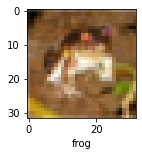

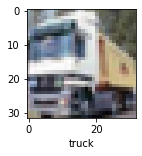

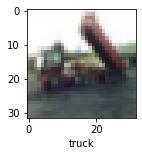

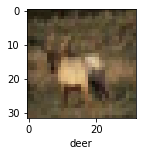

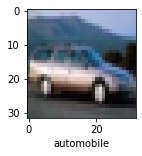

In [123]:
n_samples = 5
for i in range(n_samples):
    plot_sample(train_X, ntrain_Y, i)
    

In [68]:
train_x = train_X.astype('float32')
test_X = test_X.astype('float32')
 
train_X = train_X/255.0
test_X = test_X/255.0

In [69]:
print(train_Y[1])
print(len(train_Y[1]))
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]
print("Num_classes:\t",num_classes)

[9]
1
Num_classes:	 10


In [50]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
    
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [51]:
sgd = SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy']) 

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [53]:
#save it in your callback list
callbacks_list = [tensorboard]
model.fit(train_X, train_Y, callbacks=callbacks_list, validation_data=(test_X, test_Y), epochs=10, batch_size=32)   

Epoch 1/10
  1/625 [..............................] - ETA: 0s - loss: 2.2968 - accuracy: 0.0625WARNING:tensorflow:From /home/hpuma/.local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
625/625 [==============================] - 21s 33ms/step - loss: 1.9985 - accuracy: 0.2672 - val_loss: 1.7231 - val_accuracy: 0.4060
Epoch 2/10
625/625 [==============================] - 20s 32ms/step - loss: 1.6581 - accuracy: 0.3958 - val_loss: 1.5315 - val_accuracy: 0.4240
Epoch 3/10
625/625 [==============================] - 20s 33ms/step - loss: 1.4478 - accuracy: 0.4763 - val_loss: 1.3604 - val_accuracy: 0.4960
Epoch 4/10
625/625 [==============================] - 20s 32ms/step - loss: 1.3117 - accuracy: 0.5298 - val_loss: 1.2850 - val_accuracy: 0.5400
Epoch 5/10
625/625 [==============================] - 

In [85]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [61]:
model.save("model1_cifar_10epoch.h5")

In [124]:
# Second neural network implementation, much more concise and more raw that will have
# more detail adjustments in paper, start simple then move forward
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

In [125]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [133]:
model2.fit(train_X, ntrain_Y,callbacks=callbacks_list, epochs=10)

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5707 - accuracy: 0.8001
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5320 - accuracy: 0.8130
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4686 - accuracy: 0.8354
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4239 - accuracy: 0.8483
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3910 - accuracy: 0.8626
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3699 - accuracy: 0.8703
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3496 - accuracy: 0.8778
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2936 - accuracy: 0.8975
Epoch 9/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3017 - accuracy: 0.8950
Epoch 10/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2650 - accuracy: 0.9092

In [127]:
model2.evaluate(test_X, test_Y)

16/16 [==============================] - 0s 2ms/step - loss: 1.6088 - accuracy: 0.5320


[1.608801245689392, 0.5320000052452087]

In [128]:
y_predictions = model2.predict(test_X)
y_predictions[:5]

array([[3.2842852e-04, 3.2571619e-04, 1.2741025e-01, 6.4358217e-01,
        3.3532191e-02, 1.7526899e-01, 1.0455752e-03, 3.0382581e-03,
        1.4628813e-02, 8.3960668e-04],
       [1.0249197e-03, 2.4774843e-01, 1.7309339e-05, 1.5462008e-06,
        3.7725565e-07, 6.4560749e-07, 1.0495259e-09, 4.1092289e-07,
        7.0436901e-01, 4.6837397e-02],
       [1.0452050e-01, 6.7252028e-01, 4.0909293e-04, 8.4376101e-05,
        1.5653990e-04, 8.9211790e-05, 2.9849605e-06, 4.5367351e-04,
        1.5340950e-01, 6.8353839e-02],
       [5.9337902e-01, 3.4551963e-03, 2.3074690e-03, 2.5444685e-02,
        1.0279456e-02, 6.7261286e-04, 5.1515596e-04, 4.8553725e-04,
        3.6182737e-01, 1.6335259e-03],
       [1.3750550e-06, 2.3575478e-08, 5.3759678e-03, 3.2644277e-04,
        9.9297720e-01, 2.2277773e-04, 1.0921389e-03, 3.7234242e-06,
        3.2716659e-07, 6.9196754e-10]], dtype=float32)

In [137]:
# Finding most likley to be based on highest val from and getting class corresponding
y_classes = [np.argmax(i) for i in y_predictions]

In [139]:
# Straightforward comparison, small part
print(y_classes[:7]) # Extracted classes from predicted
print(ntest_Y[:7]) # Actual

[3, 8, 1, 0, 4, 6, 1]
[3 8 8 0 6 6 1]


test_class_predicted:	 ship


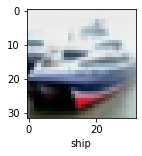

In [136]:
# 1 v 1 comparison
actual_test =  plot_sample(test_X, ntest_Y, 1)
test_class_predicted = classes[y_classes[1]]
print("test_class_predicted:\t", actual_class)

def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in train_X:
    emd = get_embedding(model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in test_X:
    emd = get_embedding(model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, train_Y, emdTestX, test_Y)

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(train_Y[0])
trainy_enc = out_encoder.transform(train_Y[0])
testy_enc = out_encoder.transform(test_Y[0])

print(emdTrainX_norm.shape)
print(emdTestX.shape)

print(len(emdTrainX_norm))
print(len(trainy_enc))

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

print(len(emdTrainX_norm))
print(len(trainy_enc))

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))